In [24]:
import math
import random
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.special import gamma, factorial
from collections import Counter
from scipy.integrate import quad
import matplotlib.pyplot as plt

# z,Mn

In [25]:
# zr = np.linspace(0.2,1.1,3)
# Mnr = np.linspace(10,200,3)

In [45]:
def SZ(x,z,Mn):
        return ((z**(z+1)/gamma(z+1))*(x**(z)/Mn**(z+1))*np.exp(-z*x/Mn))

class Schulz_zimm(st.rv_continuous):
    def _pdf(self,x):
        self.z = 1
        self.Mn = 200
        self.integral, _ = quad(SZ, self.a, self.b, args=(self.z, self.Mn))
        z = 1
        Mn = 200
        return ((z**(z+1)/gamma(z+1))*(x**(z)/Mn**(z+1))*np.exp(-z*x/Mn))/self.integral
       
        #sigma = Mn/z , n = z
iseed = 20
nmin = 3
nmax = 2000
my_cv = Schulz_zimm(a=nmin, b=nmax, name='Schulz_Zimm')
# samples = my_cv.rvs(size = 1000)
# #                     print(my_cv)
# plt.hist(samples,bins=20, legend = "z:"+str(z)+", Mn:"+str(Mn))
# plt.ylim([0,120])

In [46]:
samples3 = my_cv.rvs(size = 4000)
display(samples)

array([ 164.08701593, 1035.72128315,  370.68075707, ...,  237.27778715,
        419.66355534,   52.36210982])

/Users/sumant/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'N=4000')

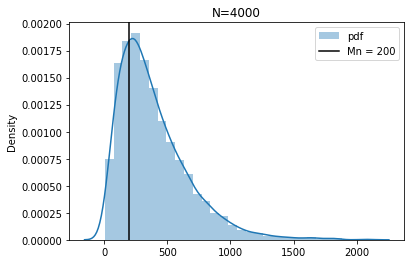

In [37]:
import seaborn as sns
sns.distplot(samples3,bins = 30,norm_hist=True,label='pdf')
plt.axvline(x=200,color='k',label ='Mn = 200')
plt.legend()
plt.title('N=4000')
# plt.ylim([0,120])

In [38]:
# Estimated PDI

samples.astype(int)
list_mon = list(samples)

from collections import Counter

print("Number of the polymer chains", len(list_mon))
print(sum(samples))
"""Calculating the dispersity"""
z = Counter(list_mon)
data = pd.DataFrame({"No_chains":z})
data.index
data.reset_index(inplace = True)
data = data.rename(columns = {'index': "No_of_monomers"})
data['weight_fraction'] = data["No_of_monomers"]*data["No_chains"]/sum(data["No_of_monomers"]* data["No_chains"])  
Mw = sum((data['No_of_monomers']*data['weight_fraction']))
print("Average molecular weight is ", Mw)
Mn = sum((data['No_of_monomers']*data['No_chains']))/sum(data['No_chains'])
print("number average molecular weight is ", Mn)
D = Mw/Mn
print("Dispersity is ", D)


Number of the polymer chains 4000
1574513.0326545483
Average molecular weight is  592.530944345376
number average molecular weight is  393.6282581636366
Dispersity is  1.505305912511629


# For generating paper graphs

array([25.21835474, 49.06901834, 44.58043089, ..., 25.28753626,
       46.89693317, 27.01525063])

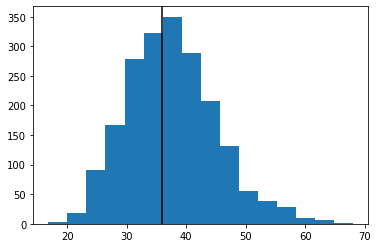

In [8]:
def SZ(x,z,Mn):
        return ((z**(z+1)/gamma(z+1))*(x**(z)/Mn**(z+1))*np.exp(-z*x/Mn))

class Schulz_zimm(st.rv_continuous):
    def _pdf(self,x):
        self.z = 25
        self.Mn = 36
        self.integral, _ = quad(SZ, self.a, self.b, args=(self.z, self.Mn))
        z = 25
        Mn = 36
        return ((z**(z+1)/gamma(z+1))*(x**(z)/Mn**(z+1))*np.exp(-z*x/Mn))/self.integral
       
        #sigma = Mn/z , n = z
iseed = 20
nmin = 3
nmax = 5000
my_cv = Schulz_zimm(a=nmin, b=nmax, name='Schulz_Zimm')

samples1 = my_cv.rvs(size = 2000)
display(samples1)

import seaborn as sns
plt.hist(samples1,bins = 16)
plt.axvline(x=36,color='k')
# plt.ylim([0,120])

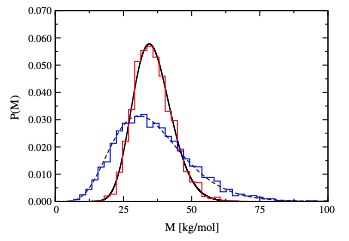

array([107.77220983, 175.85801395, 286.75329233, ..., 187.53772829,
       128.23722865, 246.05095454])

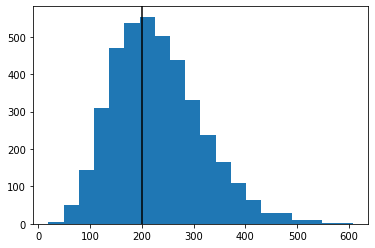

In [47]:
def SZ(x,z,Mn):
        return ((z**(z+1)/gamma(z+1))*(x**(z)/Mn**(z+1))*np.exp(-z*x/Mn))

class Schulz_zimm(st.rv_continuous):
    def _pdf(self,x):
        self.z = 6.25
        self.Mn = 200
        self.integral, _ = quad(SZ, self.a, self.b, args=(self.z, self.Mn))
        z = 6.25
        Mn = 200
        return ((z**(z+1)/gamma(z+1))*(x**(z)/Mn**(z+1))*np.exp(-z*x/Mn))/self.integral
       
        #sigma = Mn/z , n = z
iseed = 20
nmin = 3
nmax = 2000
my_cv = Schulz_zimm(a=nmin, b=nmax, name='Schulz_Zimm')

samples2 = my_cv.rvs(size = 4000)
display(samples2)

import seaborn as sns
plt.hist(samples2,bins = 20)
plt.axvline(x=200,color='k')

/Users/sumant/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sumant/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


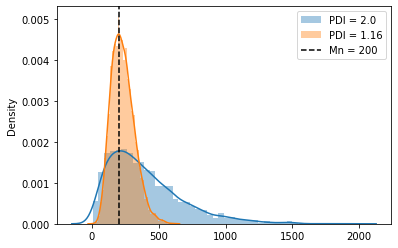

In [48]:
sns.distplot(samples3,norm_hist = True, label="PDI = 2.0")
sns.distplot(samples2,norm_hist = True, label = "PDI = 1.16")
plt.axvline(x=200,color='k',linestyle='--', label = "Mn = 200")
plt.legend()

In [50]:
samples3.max()


1970.639020124417

In [51]:
# Estimated PDI

samples3.astype(int)
list_mon = list(samples3)

from collections import Counter

print("Number of the polymer chains", len(list_mon))
print(sum(samples3))
"""Calculating the dispersity"""
z = Counter(list_mon)
data = pd.DataFrame({"No_chains":z})
data.index
data.reset_index(inplace = True)
data = data.rename(columns = {'index': "No_of_monomers"})
data['weight_fraction'] = data["No_of_monomers"]*data["No_chains"]/sum(data["No_of_monomers"]* data["No_chains"])  
Mw = sum((data['No_of_monomers']*data['weight_fraction']))
print("Average molecular weight is ", Mw)
Mn = sum((data['No_of_monomers']*data['No_chains']))/sum(data['No_chains'])
print("number average molecular weight is ", Mn)
D = Mw/Mn
print("Dispersity is ", D)


Number of the polymer chains 4000
1575518.8841590984
Average molecular weight is  584.420474979229
number average molecular weight is  393.87972103977455
Dispersity is  1.4837536531113094
